- 지난 시간에는 폴더별(label)로 데이터가 담겨져있어서 keras가 스스로 label를 찾아서 넣을 수 있게끔 해줬는데, cifar data는 그렇게 할 수가 없음(폴더별로 있는게 아니고 파일명에 label이 있어서 flow_from_directory 방법 사용할 수 없어)
- 데이터를 excel이나 csv같은 곳에 담아주고서 경로와 옆에 label을 넣어서 학습시키는 방법 쓸 거임

In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd # dataframe을 만들어 excel로 저장
import matplotlib.pyplot as plt

%matplotlib inline

### 파이썬 문자열 관련 함수 사용
- os
- glob
- replace
- split
- join
- strip

In [16]:
train_paths = glob('dataset/cifar/train/*.png')
test_paths = glob('dataset/cifar/test/*.png')

In [17]:
len(train_paths), len(test_paths)

(50000, 10000)

In [18]:
path = train_paths[0]
path

'dataset/cifar/train\\0_frog.png'

In [42]:
print(path.replace('/', ' ')) # 띄어쓰기 1칸
print(path.replace('/', '')) # 띄어쓰기 없는 ''는 아예 삭제

dataset cifar train\0_frog.png
datasetcifartrain\0_frog.png


In [28]:
'.'.join(['a', 'b', 'c']) # '.' 기준으로 합친다

'a.b.c'

In [35]:
print('     asdf    '.strip()) # 빈공간 없애줌
print('     asdf    de'.lstrip())
print('     asdf    '.rstrip())

asdf
asdf    de
     asdf


In [37]:
os.path.basename(path) # 파일명만 가지고 옴

'0_frog.png'

In [38]:
os.path.dirname(path) # 파일명제외 폴더명만 가지고 옴

'dataset/cifar/train'

In [39]:
os.path.exists(path) # path가 있냐 없냐

True

In [ ]:
os.mkdir(path) # path가 없으면 만든다 

In [47]:
fname = os.path.basename(path)
cls_name = fname.replace('.png', '').split('_')[-1]
cls_name

'frog'

### class 이름 얻은 것을 함수로 묶기

In [48]:
def get_class_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png', '').split('_')[-1]
    return cls_name

In [51]:
cls_name = get_class_name(path)
path, cls_name

('dataset/cifar/train\\0_frog.png', 'frog')

# Class 수 확인

In [52]:
class_names = []

for path in train_paths:
    cls_name = get_class_name(path)
    class_names.append(cls_name)

In [ ]:
# 위 for문 한 줄로
class_names = [get_class_name(path) for path in train_paths]

In [53]:
len(class_names)

50000

In [55]:
np.unique(class_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [62]:
uniques = np.unique(class_names, return_counts=True) # 각 class마다 몇개씩 있는지
uniques # array로 return해줌

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

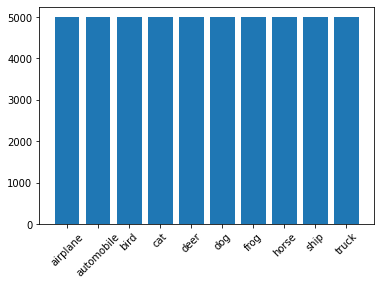

In [60]:
# 시각화
plt.bar(uniques[0], uniques[1]) # 또는 plt.bar(*uniques)
plt.xticks(rotation=45)
plt.show()

# DataFrame 생성

파이썬에서 csv 또는 excel을 다룰 때 사용되는 library  
주로 엑셀과 같이 테이블 형식으로 되어있는 데이터들을 다룹니다  

### DataFrame 생성 방법

In [65]:
data_ex = {'a':[1,2,3], 'b':[10,20,30], 'c':[100,200,300]}

In [66]:
data_ex = pd.DataFrame(data_ex)
data_ex

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [67]:
train_paths # list로 쭉 담겨져있음

['dataset/cifar/train\\0_frog.png',
 'dataset/cifar/train\\10000_automobile.png',
 'dataset/cifar/train\\10001_frog.png',
 'dataset/cifar/train\\10002_frog.png',
 'dataset/cifar/train\\10003_ship.png',
 'dataset/cifar/train\\10004_ship.png',
 'dataset/cifar/train\\10005_cat.png',
 'dataset/cifar/train\\10006_deer.png',
 'dataset/cifar/train\\10007_frog.png',
 'dataset/cifar/train\\10008_airplane.png',
 'dataset/cifar/train\\10009_frog.png',
 'dataset/cifar/train\\1000_truck.png',
 'dataset/cifar/train\\10010_airplane.png',
 'dataset/cifar/train\\10011_cat.png',
 'dataset/cifar/train\\10012_frog.png',
 'dataset/cifar/train\\10013_frog.png',
 'dataset/cifar/train\\10014_dog.png',
 'dataset/cifar/train\\10015_deer.png',
 'dataset/cifar/train\\10016_ship.png',
 'dataset/cifar/train\\10017_cat.png',
 'dataset/cifar/train\\10018_bird.png',
 'dataset/cifar/train\\10019_frog.png',
 'dataset/cifar/train\\1001_deer.png',
 'dataset/cifar/train\\10020_airplane.png',
 'dataset/cifar/train\\10021_ca

In [68]:
class_names

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane',
 'frog',
 'truck',
 'airplane',
 'cat',
 'frog',
 'frog',
 'dog',
 'deer',
 'ship',
 'cat',
 'bird',
 'frog',
 'deer',
 'airplane',
 'cat',
 'automobile',
 'deer',
 'airplane',
 'frog',
 'frog',
 'bird',
 'horse',
 'frog',
 'cat',
 'truck',
 'airplane',
 'deer',
 'dog',
 'horse',
 'automobile',
 'frog',
 'horse',
 'truck',
 'automobile',
 'bird',
 'horse',
 'horse',
 'ship',
 'airplane',
 'cat',
 'horse',
 'deer',
 'horse',
 'cat',
 'automobile',
 'deer',
 'airplane',
 'deer',
 'frog',
 'frog',
 'automobile',
 'deer',
 'truck',
 'bird',
 'frog',
 'deer',
 'deer',
 'dog',
 'airplane',
 'deer',
 'frog',
 'airplane',
 'ship',
 'cat',
 'deer',
 'ship',
 'ship',
 'automobile',
 'cat',
 'truck',
 'dog',
 'horse',
 'automobile',
 'truck',
 'deer',
 'horse',
 'truck',
 'automobile',
 'deer',
 'truck',
 'horse',
 'dog',
 'bird',
 'horse',
 'cat',
 'deer',
 'ship',
 'ship',
 'bird',
 'bird',
 'auto

In [70]:
train_paths[0], class_names[0]

('dataset/cifar/train\\0_frog.png', 'frog')

In [76]:
data = {'name':train_paths, 'class':class_names}
train_df = pd.DataFrame(data)
train_df.head() # train set

,name,class
0,dataset/cifar/train\0_frog.png,frog
1,dataset/cifar/train\10000_automobile.png,automobile
2,dataset/cifar/train\10001_frog.png,frog
3,dataset/cifar/train\10002_frog.png,frog
4,dataset/cifar/train\10003_ship.png,ship


In [77]:
test_class_names = [get_class_name(path) for path in test_paths]

data = {'name':test_paths, 'class':test_class_names}
test_df = pd.DataFrame(data)
test_df.head() # test set

,name,class
0,dataset/cifar/test\0_cat.png,cat
1,dataset/cifar/test\1000_dog.png,dog
2,dataset/cifar/test\1001_airplane.png,airplane
3,dataset/cifar/test\1002_ship.png,ship
4,dataset/cifar/test\1003_deer.png,deer


## 만들어진 DataFrame 저장

In [78]:
# 이름 설정
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [79]:
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
# index=True가 default인데 이렇게 하면 dataframe의 index도 그대로 가져와짐
# index=False를 해줘야 index 없이 가져와짐

index는 앞에 index가 csv 안에서 앞에 저장이 되지 않도록 하기 위함

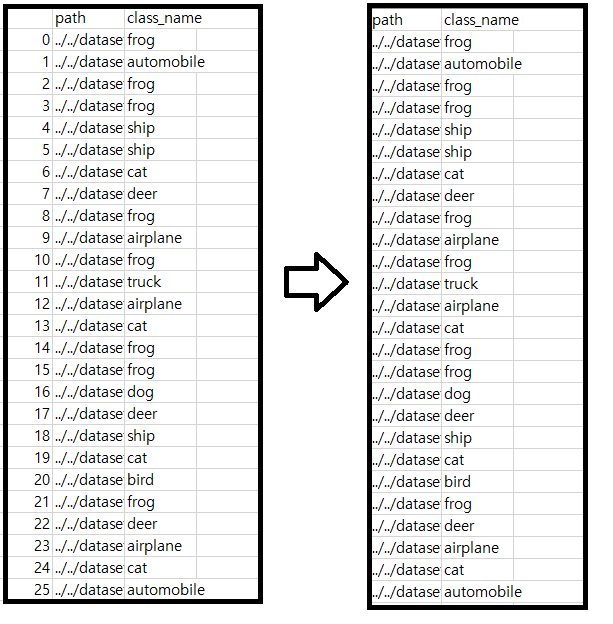

## Data 확인

In [4]:
from PIL import Image
from tqdm.notebook import tqdm

In [80]:
heights = []
widths = []

In [81]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape # 앞에서 다룬 mnist_png는 channel이 없었는데 cifar은 RGB라서 channel=3

(32, 32, 3)

In [82]:
# 각 이미지 size 확인
for path in tqdm(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h,w,c = image.shape # 하지만 channel에는 우리는 관심없어
    
    heights.append(h)
    widths.append(w)

In [83]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))